<h1 align="center"> Introduction to Anomaly Detection </h1>
<br>

- 원본 출처 : https://www.kaggle.com/code/ysjang0926/kor-introduction-to-anomaly-detection-r01

## [Kaggle] Credit Card Fraud Detection
![image](https://user-images.githubusercontent.com/54492747/149662762-091e7f64-f283-4b5d-a169-c3a49e3c31eb.png)

필사한 노트북은 다음과 같습니다.
* https://www.kaggle.com/code/shivamb/semi-supervised-classification-using-autoencoders/notebook

<br>

분석 데이터는 Kaggle의 [Credit Card Fraud Detection(신용카드 사기 검출)](https://www.kaggle.com/mlg-ulb/creditcardfraud)을 사용하였습니다. <br>
해당 문제는 2013년 9월 유럽의 신용카드 사용자들에게 발생한 2일간의 실제 신용카드 거래내역에 대해 Fraud(사기)를 검출하는 문제이며, 데이터는 보안상 PCA로 변환하여 제공되었습니다. 총 284,807건의 거래내역이 제공되며, 이 중 사기 거래(Fraud Transaction)는 492건 밖에 되지 않습니다. 사기 거래가 정상 거래에 비해 매우 적은 0.172%로 ‘Highly unbalanced’한 특징을 가진 데이터셋이고 총 31개의 칼럼으로 이루어져 있습니다.

## 1. Anomaly Detection란?
![image](https://user-images.githubusercontent.com/54492747/149662959-a1d9dfcd-e5c9-4fe6-8333-9ccb123b4196.png)

**Anomaly Detection(이상 탐지)**란, Normal(정상)  데이터만의 분포와 특징을 파악하여 Abnormal(비정상) 데이터를 구별해내는 문제를 의미합니다. 대부분의 데이터와 본질적인 특성이 다른 관측치를 찾아내는 Anomaly Detection 알고리즘은 오랜 시간 동안 연구되어온 분야이며, Deep Learning 방법을 적용하는 등 다양한 방향으로 발전하고 있습니다. <br>
또한 제조업뿐만 아니라 의료 영상, Social Network, 금융 사기  등 다양한 분야에서 응용이 되고 있으며 주요 사례는 다음과 같습니다.
* Industrial Anomaly Detection
    - 산업 속 제조업 데이터에 대한 이상치를 탐지하는 사례
    - 각종 제조업 도메인 이미지 데이터에 대한 외관 검사, 장비로부터 측정된 시계열 데이터를 기반으로 한 고장 예측 등 다양한 적용 사례가 있음
    - 외관상에 발생하는 결함과 장비의 고장 등의 Abnormal 관측치가 굉장히 적은 수로 발생하지만 정확하게 예측하지 못하면 큰 손실을 유발하게 됨
* Medical Anomaly Detection
    - 의료 영상, 임상 뇌파 기록 등의 의학 데이터에 대한 희귀 현상을 탐지하는 사례
    - 주로 신호 데이터와 이미지 데이터를 다루며 X-ray, CT, MRI, PET 등 다양한 장비로부터 취득된 이미지를 다룸
* Social Networks Anomaly Detection
    - 스팸, 가짜 사용자, 악성 유저와 같이 Social Network 상의 불법 행동을 탐지하는 사례
    - 주로 Text 데이터를 다루며 Text를 통해 스팸 메일, 비매너 이용자, 허위 정보 유포자 등을 검출함
* Fraud Detection
    - 은행 거래, 보험, 신용, 금융 관련 데이터에서 불법 행위를 검출하는 사례
    - Kaggle의 [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)과 같은 공개된 challenge도 진행된 바 있음

<br>

여기서 많은 사람들은 **이상치**라고 하는 것을 다양하게 받아들이는데 크게 1) Anomaly, 2) Novelty, 3) Outlier 로 구분할 수 있습니다. 이 3가지는 용어가 가지는 뉘앙스 차이가 조금 있다고 생각하여서 다음과 같이 정리해보았습니다.

### Anomaly 
**Anomaly**는 대부분의 데이터와 본질적인 특성이 다르며, 기존 분포에서 멀리 떨어져 있어 전혀 다른 방식으로 생성되었을 것으로 추정되는 관측치를 의미합니다. 즉, 다른 매커니즘에 의해 발생된 것처럼 다른 관측치와는 매우 다른 관측치를 말합니다. <br>
아래 그림에서 $N_1$과 $N_2$는 Normal 데이터로 고려할 수 있지만, 점 $O_1$, $O_2$, $O_3$는  $N_1$과 $N_2$의 범주에 멀리 벗어나 있기에 Anomaly 데이터로 고려할 수 있습니다. <br>
![image](https://user-images.githubusercontent.com/54492747/161285018-bacaca0d-a220-40f6-af3f-2ee26dacfdac.png)

### Novelty
**Novelty**는 본질적인 데이터는 같지만 유형이 다른 관측치를 의미합니다. 즉, 데이터에서 이전에 관찰되지 않은 새로운 패턴을 가진 관측치를 말합니다. <br>
하지만 Novelty 데이터는 Anomaly로 간주되지 않고 Normal 데이터 범주로 포함되기 때문에 차이가 있습니다.
아래 그림에서 Novel이라 표시된 백호는 Normal인 '호랑이'라는 Normal 데이터 범주로 고려되지만, 이전에 보지 못한 새로운 패턴에 해당하게 됩니다. 그에 반면, 말, 치타, 사자, 치타는 '호랑이' 범주에 속하지 않기 때문에 Anomaly 데이터로 고려할 수 있습니다. <br>
![image](https://user-images.githubusercontent.com/54492747/161286077-8fcf93e8-804d-4db2-be63-ddb0590cf186.png)

### Outlier
**Outlier**는 데이터의 전체적인 패턴에서 벗어난 관측치를 의미합니다. Outlier의 경우 보통 통계적 맥락에서 Anomaly와 비슷하게 일컫는 말입니다. 하지만 굳이 차이를 따지자면 데이터가 시계열이냐 아니냐로 구분됩니다. (시간과의 관계 여부)
* Anomaly : **시간 또는 순서**가 있는 흐름에 따른 패턴이 보편적인 패턴들과 다른 관측치
* Outlier : **시간과 관련 없이** 대상을 표현하는 관측치들의 위치를 보고 보편적인 패턴과 벗어난 관측치 <br>
![image](https://user-images.githubusercontent.com/54492747/161287940-0cd7cc7d-4705-40a1-ba29-657e984e7257.png)

<br>

이상치 탐지 시 유의할 점은 다음과 같습니다.
* class imbalance (클래스 불균형) 문제
    * 이상치가 극단적으로 적고 정상 데이터가 대부분이기 때문
* 이상치에 대한 정의는 데이터의 특성과 산업 분야에 따라 달라지기 때문에 이를 유의해서 분석해야 함

<br>

## 2. Anomaly Detection 분류
Anomaly Detection는 여러 측면에서 분류되고,  총 3가지 분류 방법으로 이 용어들을 정리하면 다음과 같습니다.

1.  학습시 **비정상 sample의 포함 여부** 및 **label 유무**에 따른 분류
    - Supervised, Semi-supervised, Unsupervised Anomaly Detection으로 나뉘어짐
2.  **비정상 sample 정의**에 따른 분류
    - 비정상적인 sample의 성격이 정상 sample과 어떻게 다른지
    - 데이터가 시간에 따라 측정되는 지 아닌 지
3.  **정상 sample의 class 개수**에 따른 분류
    - 정상 sample의 class가 Multi-class인지

이번 글에는 [학습시 비정상 sample의 포함 여부 및 label 유무에 따른 분류]를 중점으로 설명하도록 하겠습니다. 여기서 label이란 각 관측치가 Normal인지 Abnormal인지에 대한 정보를 의미합니다. 이런 label 유무에 따라 Supervised, Semi-supervised, Unsupervised Anomaly Detection으로 나뉘어집니다.

### 1) Supervised Anomaly Detection
주어진 학습 데이터 셋에 Normal 관측치와 Abnormal 관측치에 대한 Label이 **모두** 존재하는 경우 Supervised Learning 방식이며, 이를 Supervised Anomaly Detection이라 부릅니다.<br>
Supervised Learning 방식은 다른 방법 대비 정확도가 높은 특징이 있습니다. 그래서 높은 정확도를 요구로 하는 경우에 주로 사용되며, 비정상 sample을 다양하게 보유할수록 더 높은 성능을 달성할 수 있습니다.<br>
하지만 Anomaly Detection을 적용하는 분석 데이터에는 label이 모두 있는 경우가 드물고 Normal 관측치보다 Abnormal 관측치의 발생 빈도가 극히 적기 때문에, 일반적인 Supervised Learning으로 학습하게 되면 Class-Imbalance(클래스 불균형) 문제를 자주 겪게 되어 좋은 성능을 내지 못하게 됩니다.  또한 특정 데이터의 정상/이상 여부를 정확히 알지 못하게 되면 Supervised Learning 기반 방법론을 적용하는데 한계가 있기 때문에, Semi-supervised, Unsupervised Learning에 비해 잘 활용되지 않습니다.<br>
이러한 문제를 해결하기 위해 Data Augmentation(증강), Loss function 재설계, Batch Sampling 등 다양한 연구가 수행되고 있습니다. 
* 장점
	* 다른 방법 대비 정상/이상 판정 정확도가 높음
* 단점
	* Abnormal 관측치를 취득하는데 시간과 비용이 많이 들고, Class-Imbalance 문제 해결이 필요함

### 2) Semi-supervised Anomaly Detection
Supervised Anomaly Detection 방식의 가장 큰 문제는 Normal 관측치보다 Abnormal 관측치의 발생 빈도가 극히 적기 때문에 Class-Imbalnace 문제가 발생한다는 것입니다. 그렇기 때문에 정확도를 높이기 위해서는 Abnormal 관측치를 확보해야하는데 이것은 많은 시간이 비용이 든다는 단점이 있습니다. <br>
제조 데이터를 예로 들면, 제품의 외관 검사를 할 때 결점 이미지 데이터가 저장되는데 이때 정상품 이미지 또는 대표 결점의 이미지들이 수천장 취득되는 동안 특정 결점의 이미지는 겨우 1~2장 정도 발생하는 상황이 발생하게 됩니다.
이처럼 Class-Imbalance가 매우 심한 경우에는 **Normal 관측치만 가지고 모델을 학습**하기도 하는데, 이 방식을 Semi-supervised Learning이라 합니다. <br>
Semi-supervised Learning은 **Supervised Learning 방식과 Unsupervised Learning 방식의 조합**으로, Unsupervised Learning은 데이터의 대표적인 패턴을 학습하는 데 사용되고 Supervised Learning은 그 후 예측을 하기 위해 대표적인 패턴을 학습하는 데 사용됩니다. 즉, 이 학습을 통해 Normal 관측치들의 boundary를 만들어서, 이 boundary 밖에 있어 boundary에 속하지 않는 관측지들을 모두 Abnormal 관측치로 탐지하는 방법입니다.
* 장점
	* Normal 관측치만 이용하여 학습이 가능함
* 단점
	* Supervised Anomaly Detection 방법론과 비교했을 때 상대적으로 정상/이상 판정 정확도가 떨어짐

### 3) Unsupervised Anomaly Detection
Semi-supervised Anomaly Detection 방식은 Normal 관측치가 필요하며, 수많은 관측치들 중에 어떤 것이 Normal 관측치인지 Abnormal 관측치인지 정확히 알고 있어야 합니다. Nomal 여부를 정확하게 알기 어려운 상황을 고려하여, **대부분의 데이터가 Normal 관측치라는 가정을 하여 label 취득 없이 학습을 시키는** Unsupervised Anomaly Detection 방법론이 있습니다. <br>
Unsupervised Anomaly Detection은 **정상치와는 동떨어진 representation을 찾는 방법**입니다. 대표적으로 밀도를 추정하여 Abnormal 관측치를 탐지하는 Isolation Forest와 Local Outlier Factor 방법이 있으며, Principal Component Analysis(PCA, 주성분 분석)를 이용하여 차원을 축소하고 복원을 하는 과정을 통해 비정상 sample을 검출하는 방법도 있습니다. <br>
최근 수집 가능한 데이터의수가 급증하면서 기존 방법론들은 정확도에서 한계를 보이고 있어, 이에 따라 다양한 딥러닝 기반 방법론들이 활발하게 연구되고 있습니다. Deep Learning 기반으로는 대표적으로 Autoencoder 기반의 방법론이 주로 사용되고 있습니다. 
* 장점
	* 데이터의 내재적인 특성을 학습하여 데이터 내 유사성을 발견하는 작업이기에, Labeling 과정과 알고리즘 훈련이 필요하지 않음
* 단점
	* 정상/이상 판정 정확도가 높지 않고, Autoencoder의 degree of compression(차원축소를 얼만큼 해야하는지) 등과 같은 hyper-parameter에 매우 민감함 (조정 필요)
    
<br>

많은 참가자들은 주로 dataset balancing(정상 데이터를 비정상 데이터 개수에 맞춰 sampling), Boosting models 등과 같은 다양한 접근 방식을 사용했습니다.<br>
이번 노트북에서는 Semi-supervised Learning을 사용하여 Classification을 진행하였으며, Auto Encoder를 사용하여 데이터를 학습한 다음 간단한 선형 분류기(linear clssifier)를 훈련시켜 각각의 클래스로 분류하였습니다. <br>
**(Auto Encoder를 차원 축소로만 사용 → 차원 축소된 값으로 다시 Classification 진행)**

-----------

## Semi Supervised Classification using AutoEncoders

이번 노트북의 특징은
1. Time 변환 : Time = Time / 3600 % 24
2. 2,000개의 **non-Fraud sample만 사용**하여 Auto Encoder 학습
3. 0~1 Scale한 데이터로 학습
4. 학습된 Auto Encoder에 **Encoder만 활용하여 차원 축소** 후, **축소된 데이터로 다시 Classification** (여기선 Logistic Regression 사용)

<br>

#### Contents 
1. Dataset Preparation  
2. Visualize Fraud Vs Non Fraud Transactions  
3. AutoEncoders : Latent Representation Extraction  
4. Obtain the Latent Representations  
5. Visualize Latent Representations : Fraud vs Non Fraud  
6. Simple Linear Classifier  
7. Applying the same technique on Titanic Dataset

<br>

### 1. Dataset Preparation
필요한 라이브러리를 모두 불러오고 pandas 데이터프레임을 사용하여 데이터셋을 불러옵니다.

In [1]:
from keras.layers import Input, Dense  # 신경망의 입력 및 밀집층(dense layer)을 정의하는데 사용
from keras.models import Model, Sequential  # Keras의 모델 정의를 위해 사용 (Model은 함수형 API, Sequential은 순차 모델)
from keras import regularizers  # 신경망 모델에 정규화 항목을 추가하여 과적합 방지
from sklearn.model_selection import train_test_split  # 데이터를 학습용과 테스트용으로 나누기 위해 사용
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델을 생성하고 학습시키기 위해 사용
from sklearn.metrics import classification_report, accuracy_score  # 모델의 성능을 평가하기 위한 메트릭(정밀도, 재현율 등)과 정확도 점수
from sklearn.manifold import TSNE  # 고차원 데이터를 저차원으로 시각화하기 위해 사용
from sklearn import preprocessing  # 데이터 전처리(스케일링, 인코딩 등)를 위해 사용
import matplotlib.pyplot as plt  # 데이터 시각화를 위해 사용되는 대표적인 라이브러리
import pandas as pd  # 데이터 조작과 분석을 위한 데이터프레임 생성 및 조작 라이브러리
import numpy as np  # 행렬 연산과 배열 처리를 위한 라이브러리
import seaborn as sns  # 고급 데이터 시각화를 위한 라이브러리 (matplotlib을 기반으로 함)
sns.set(style="whitegrid")
np.random.seed(203)

data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24) # time 변환 세팅
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


데이터셋은 총 31개의 변수가 있습니다.
* Time : 첫번째 transaction으로부터 경과된 시간(초)
* V1 ~ V28 : PCA 변환된 변수(28개)
* Amount : 거래 금액
* Class : Target 변수(0: 정상, 1: 비정상)

<br>
Target 변수 분포를 살펴보면 아래와 같습니다.<br>
총 284,807건의 거래내역이 제공되며, 이 중 사기 거래(Fraud Transaction)는 492건 밖에 되지 않습니다. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


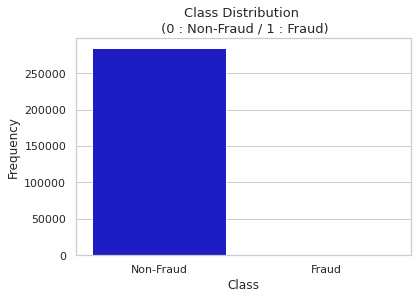

In [3]:
colors = ["#0101DF", "#DF0101"]
LABELS = ["Non-Fraud", "Fraud"]
sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distribution \n (0 : Non-Fraud / 1 : Fraud)', fontsize=13)
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

284,315 : 492

In [4]:
vc = data['Class'].value_counts().to_frame().reset_index()  # 'Class' 열의 값들을 세어 데이터프레임으로 변환하고, 인덱스를 리셋하여 새로운 데이터프레임 생성
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))  # 'Class' 열의 각 값을 데이터 전체 길이로 나누어 백분율로 변환하여 'percent' 열에 추가
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})  # 데이터프레임의 열 이름을 'index'에서 'Target'으로, 'Class'에서 'Count'로 변경
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


거래 금액(Amount)은 상대적으로 적고, 평균은 대략 USD 88 정도이며, NULL 값이 없으므로 대체할 방법을 찾지 않아도 됩니다.

In [5]:
# 각 컬럼의 기초 통계값 확인
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# null 값 체크
data.isnull().sum().max()

0

In [7]:
# null 값 체크
data.isnull().values.any()

False

이 문제의 가장 큰 문제 중 하나는 **사기 거래가 0.17%**에 불과하기 때문에 대상의 **불균형이 매우 크다는 점**입니다. 여기에서는 **non-fraud 거래내역의 1,000행만 사용**하였습니다.

#### Consider only 1000 rows of non fraud cases

In [8]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

print(type(non_fraud))
print(type(fraud))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177464,10.218333,-0.104941,0.751601,0.225560,-0.748639,1.099622,0.395713,0.791145,0.200272,-0.169629,...,-0.161553,-0.137934,0.155450,-0.948801,-0.700699,0.231562,0.305686,0.088287,0.89,0
231777,16.811389,-0.122409,1.149425,-2.611468,-0.618719,0.680058,-0.544380,2.006136,-0.079991,-0.641383,...,0.169556,0.358125,0.024278,-0.096492,-0.340016,0.525329,-0.151007,-0.020035,209.99,0
210722,14.360556,1.938091,0.089758,-1.238035,0.986414,-0.351128,-1.755183,0.193077,-0.359134,0.540036,...,0.138019,0.565442,0.142189,0.819158,-0.047255,0.403121,-0.043031,-0.026416,22.80,0
139729,23.143333,-0.839001,0.897658,2.142027,-0.596557,0.988985,0.511371,1.573387,-1.441615,0.897911,...,0.109986,1.241138,-0.415167,-0.241730,-0.744454,0.075347,-2.385094,-1.713441,10.61,0
27056,9.546389,-1.046114,1.405435,0.212857,0.400113,0.484588,0.554874,0.134874,0.698825,-0.462015,...,0.118157,0.383796,-0.171989,-1.169311,-0.103967,-0.232531,0.278012,0.189607,5.00,0


In [11]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.112778,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,0.131111,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,1.239444,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,1.940556,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,2.088611,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [12]:
df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)  # 'non_fraud'와 'fraud' 데이터프레임을 합치고, 데이터를 무작위로 섞은 후, 인덱스를 리셋하여 새로운 데이터프레임 'df' 생성
X = df.drop(['Class'], axis = 1).values  # 'df'에서 'Class' 열을 제외한 나머지 열들로 이루어진 값을 'X'에 할당
Y = df["Class"].values  # 'df'의 'Class' 열의 값을 'Y'에 할당

In [16]:
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(1492, 30)
[[ 1.24783333e+01 -4.69678467e-01  6.64138028e-01 ... -2.90249217e-01
  -3.29506840e-01  2.53920000e+02]
 [ 1.75263889e+01  9.70481912e-01 -8.47492750e-01 ...  6.04162068e-02
   4.25376526e-02  1.45420000e+02]
 [ 1.46436111e+01 -3.97593926e+00 -1.24493887e+00 ...  8.77423851e-01
   6.67568430e-01  8.30000000e+00]
 ...
 [ 1.48291667e+01  1.23781545e+00 -9.35982632e-01 ...  3.55347752e-02
   1.36201938e-02  2.99500000e+01]
 [ 2.30419444e+01 -6.76142671e-01  1.12636606e+00 ...  3.85107449e-01
   1.94361479e-01  7.78900000e+01]
 [ 1.30361111e+01  2.09212691e+00 -1.22863088e-02 ... -1.50543753e-01
  -1.00051523e-01  1.00000000e+01]]


In [17]:
print(type(Y))
print(Y.shape)
print(Y)

<class 'numpy.ndarray'>
(1492,)
[0 0 1 ... 0 1 0]


<br>

### 2. Visualize Fraud and Non-Fraud Transactions 

이상치가 있다는 것은 기존의 데이터가 어느 정도 패턴을 가지고 있다는 뜻이며, 이 패턴이 존재하는지를 t-SNE를 사용하여 Fraud(사기)와 Non-Fraud(비사기) 거래의 특성을 시각화하였습니다. <br>

**t-SNE(t-Distributed Stochastic Neighbor Embedding)란?** <br>
t-SNE는 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법이며, 고차원 데이터의 시각화에 용이하게 사용되며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리한 상태이므로 데이터 구조를 이해하는 데 도움을 줍니다. <br>
고차원 공간에서의 각 데이터 포인트 주변으로 유사도를 계산하여, 각 데이터 포인트를 2차원에서 원본 특성 공간에서 비슷한 데이터 구조는 가깝게, 비슷하지 않은 데이터 구조는 멀리 떨어지게 만드며, 즉 이웃 데이터 포인트에 대한 정보를 보존하려고 노력합니다. <br>

***PCA와 차이점*** <br>
**1. PCA는 linear한 방법을 사용하지만, t-SNE는 비선형적인 방법의 차원축소 방법**

    - PCA : 공분산 행렬에서 고유벡터를 계산
    - t-SNE : 고차원 공간에서의 점들의 유사성과 그에 해당하는 저차원 공간에서의 점들의 유사성을 계산
2. t-SNE는 input feature를 확인하기 어렵기 때문에 t-SNE 결과만 가지고 무언가를 추론하기 어려움
    - **따라서 t-SNE는 주로 시각화 툴로 사용됨**

<br>

**t-SNE 구하는 방법**
1. 각 데이터 포인트 주변으로 유사도를 구해 클러스터를 만듦.
2. 관심 데이터 포인트를 하나 잡고, 그 값을 평균으로 갖는 정규분포그래프를 그림. → 주변의 데이터의 경우(같은 클러스터) 유사도가 높게 나오고,(정규분포의 확률값) 먼 데이터는 유사도가 낮음.
3. 모든 데이터 포인트에 대한 유사도를 그려, 상관계수그래프처럼 나열함. → 같은 클러스터는 높은 유사도를 지님.
    * 데이터 포인트 사이의 거리를 모두 구하면, 처음에 구한 상관계수그래프같은 그림이 안나옴. 따라서 그와 유사한 형태로 바꿔주는 작업을 수행함
    * 그 작업은 한번에 안되고, 한번에 한 이동을 수행함 (연산에 필요한 시간이 긺)
4. 그 뒤 임의로 낮은 차원으로 데이터 포인트를 사영시키고, 데이터마다 유사도를 계산함.(정규분포로 했듯이)
    * 그러나 여기선 t분포를 대신 사용하는데, 그래서 t-sne임
    * t-분포를 사용하는 이유는, 클러스터들을 좀더 성기게 분포시키기 위함
    
<br>

모든 점은 거래(transaction)를 나타내며, Non-Fraud(비사기) 거래는 녹색으로 표시되고 Fraud(사기) 거래는 빨간색으로 표시됩니다. 두 축은 tsne에 의해 추출된 성분입니다.

In [18]:
def tsne_plot(x1, y1, name="graph.png"):  # t-SNE 시각화를 수행하는 함수 정의, x1은 입력 데이터, y1은 레이블, name은 저장될 파일 이름
    tsne = TSNE(n_components=2, random_state=0)  # t-SNE 객체 생성, 2차원으로 변환, 결과의 재현성을 위해 random_state 설정
    X_t = tsne.fit_transform(x1)  # 입력 데이터 x1을 t-SNE를 사용하여 2차원으로 변환

    plt.figure(figsize=(12, 8))  # 새로운 그림(figure) 생성, 크기는 12x8 인치
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', alpha=0.8, label='Non Fraud')  # 비사기(non-fraud) 데이터 포인트를 녹색으로 표시
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', alpha=0.8, label='Fraud')  # 사기(fraud) 데이터 포인트를 빨간색으로 표시

    plt.legend(loc='best')  # 최적의 위치에 범례 표시
    plt.show();

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


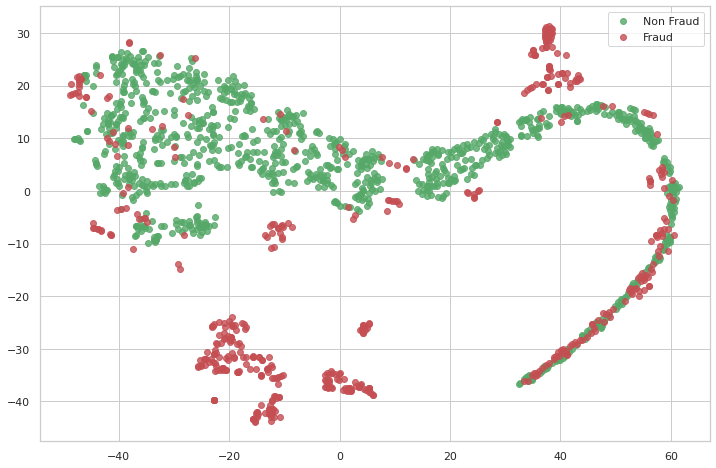

In [19]:
tsne_plot(X, Y, "original.png")

위의 그래프를 보면 Fraud(사기) 거래에 매우 가까운 비사기(Non-Fraud) 거래가 많기 때문에 모델에서 정확하게 분류하기 어렵다는 것을 알 수 있습니다.

<br>

### 3. AutoEncoders to the rescue 

**Auto Encoder(오토인코더)란?** <br>
Autoencoder는 출력이 입력과 동일한 특수한 유형의 신경망(neural network) 아키텍처입니다. 입력 데이터의 극히 낮은 level을 학습하기 위해 unsupervised 방식으로 훈련되며, 그런 다음 이러한 낮은 level의 기능은 실제 데이터를 투영하기 위해 다시 변형됩니다.<br>

Autoencoder는 입력을 그대로 출력(복원)해내도록 하는 목적 함수를 갖는 항등 함수(identity function) 모델링이며, **입력된 데이터의 특성을 요약**하는 `Encoder(인코더)`와 **요약된 정보를 복원**하는 `Decoder(디코더)`로 구성되어있습니다. 입력값을 답으로 주기 때문에 스스로 학습을 한다고 해서 자기지도학습이라고 이야기합니다.<br>
* **가정 : 정상 관측치들은 불량 관측치보다 더 잘 복원될 것이다.**

차원이 축소되는 부분을 `Bottlenect, Latent Space`이라고 하며, Autoencoder는 z 부분(아래 그림 참조)을 효과적으로 학습하는 것이 목적입니다. <br>

보통 MSE 손실 함수를 사용하며, 중간에 위치한 몇 개의 뉴런의 병목(bottle-neck) 현상이 심하여 Decoder에서 원래 입력을 재생산(reproduce)하는 데 사용할 수 있는 저차원 코드로 입력을 압축하는 효과적인 표현을 생성해야 합니다. 이때 고차원 공간 상의 입력 데이터를 저차원의 공간으로 맵핑(mapping)하여 잠재적인 변수로 표현(latent representation)하였다가, 다시 입력과 같은 고차원의 공간으로 복원해내야 합니다. 데이터가 잘 복원된 경우 저차원의 데이터 특성 공간을 잘 파악했다고 볼 수 있습니다. <br>

![image](https://user-images.githubusercontent.com/54492747/149668945-f6bdce37-ffcf-4432-9750-78eb0319a04e.png)

<br>

Autoencoder는 **입력 데이터와 복원된 데이터 사이의 차이(재구축 오차, Reconstruction Error)를 계산**하여 이상치를 탐지합니다. <br>

##### step1)
아래와 같이 Autoencoder를 통해 왼쪽의 Input값(X)이 오른쪽의 Reconstructed Input값(X')으로 나오게 됩니다. <br>
![image](https://user-images.githubusercontent.com/54492747/182134078-553eea7c-074e-429d-9b72-832af6a80e4f.png)

##### step2)
X와 X'값에 대한 재구축 오차 이상치 점수를 산출하게 되며, 재구축 오차가 특정 임계값보다 큰 경우 불량 관측치로 판단하게 됩니다. <br>
![image](https://user-images.githubusercontent.com/54492747/182135119-49eb2731-48ed-430a-b145-75c7d7ad9ddb.png)

<br>

**3줄 요약** <br>
- Autoencoder는 어떤 데이터의 입력을 받은 후, 정보를 압축시켰다가 다시 확장하며 입력받은 것과 최대한 비슷한 결과값을 반환하는 '재구성'의 방법을 통해 특정 데이터의 패턴을 인코딩함
- 신용카드 거래 데이터셋은 대부분 정상 거래 데이터로 이루어져 있으며, 이상 거래 데이터는 적게 포함되어 있는 불균형한 데이터셋임
- Autoencoder 모델을 정상 거래 데이터만으로 학습시키면 이상 거래 데이터가 입력으로 주어지는 경우에는 재구성이 잘 안 되는데, 이 원리를 활용해 신용카드 이상 거래를 탐지함

<br>

비사기(Non-Fraud) 거래만 보여주는 Autoencoder 모델을 생성할 것이며, 모델은 비사기(Non-Fraud) 케이스의 가장 좋은 부분을 학습할 것입니다. 동일한 모델이 Fraud(사기) 케이스를 생성하는데 사용되며 Fraud(사기) 케이스가 아닌 것과 다를 것으로 예상합니다.<br>

keras 패키지를 사용하여 동일한 차원을 갖는 하나의 Input layer와 Output layer가 있는 Network를 생성하였습니다. (비사기(Non-Fraue) 케이스의 형태)
* Network의 구조(뉴런수)는 input → 100 → 50 → 50 → 100 → input으로, 가운데(Bottle-neck Layer) Dimension이 50임
* 시각화하는 과정에서 이를 다시 2차원으로 t-SNE를 활용하여 축소하고 시각화함

In [20]:
## input layer 
input_layer = Input(shape=(X.shape[1],))  # 입력 레이어 정의, 입력 데이터의 형태는 X 데이터의 열 개수와 동일

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)  # 첫 번째 인코딩 레이어
# 100개의 뉴런과 tanh 활성화 함수, L1 정규화 적용
encoded = Dense(50, activation='relu')(encoded)  # 두 번째 인코딩 레이어
# 50개의 뉴런과 ReLU 활성화 함수

## decoding part
decoded = Dense(50, activation='tanh')(encoded)  # 첫 번째 디코딩 레이어
# 50개의 뉴런과 tanh 활성화 함수
decoded = Dense(100, activation='tanh')(decoded)  # 두 번째 디코딩 레이어
# 100개의 뉴런과 tanh 활성화 함수

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)  # 출력 레이어
# 원래 입력 데이터와 같은 형태의 출력, ReLU 활성화 함수

In [ ]:
# Ex. Dense 사용 예시

Dense(
    units=64,  # 출력 공간의 차원
    activation='relu',  # 활성화 함수
    use_bias=True,  # 편향 사용 여부
    kernel_initializer='glorot_uniform',  # 커널 초기화
    bias_initializer='zeros',  # 편향 초기화
    kernel_regularizer=regularizers.l2(0.01),  # 커널 정규화
    bias_regularizer=None,  # 편향 정규화
    activity_regularizer=None,  # 활성화 정규화
    kernel_constraint=None,  # 커널 제약 조건
    bias_constraint=None  # 편향 제약 조건
)


Input layer와 Output layer를 컴파일하여 모델 아키텍처를 생성하였습니다. 또한 옵티마이저(optimizer)와 손실함수(loss function)를 추가하여, `adadelta`를 옵티마이저로 사용하고 `mse`를 손실 함수로 사용하였습니다.

In [21]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

또한 모델 학습 전에, 각 변수의 범위가 다르기 때문에 **Min-Max scaling** 을 통해 수준을 맞춰주는 작업을 수행하였습니다.

In [22]:
x = data.drop(["Class"], axis=1)  # 'Class' 열을 제외한 나머지 열들을 새로운 데이터프레임 'x'에 저장
y = data["Class"].values  # 'Class' 열의 값을 numpy array type으로 'y'에 저장

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)  # Min-Max 스케일러를 사용하여 'x'의 값을 0과 1 사이로 변환하고, 'x_scale'에 저장
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]  # 'y' 값이 0인 (비사기) 데이터는 'x_norm'에, 'y' 값이 1인 (사기) 데이터는 'x_fraud'에 각각 저장

이 접근 방식의 장점은 좋은 표현(representation)을 학습하기 위해 너무 많은 데이터 샘플이 필요하지 않다는 것입니다. Autoencoder를 훈련시키기 위해 **2,000행의 비사기(Non-Fraud) 케이스만** 사용할 것이며, 많은 Epoch에 대해 이 모델을 실행할 필요가 없습니다.

**설명** : 원본 데이터셋에서 작은 샘플을 선택하는 것은 한 클래스 특성(비사기(Non-Fraud))이 다른 클래스 특성(사기(Fraud))의 특성과 다를 것이라는 직감을 기반으로 합니다. 이러한 특성을 구별하려면 Autoencoder에 데이터의 하나의 클래스만 표시해야 합니다. 이는 Autoencoder가 하나의 클래스만 학습하고 다른 클래스를 자동으로 구별하려고 하기 때문입니다.

In [24]:
history = autoencoder.fit(x_norm[0:2000], x_norm[0:2000],  # autoencoder 모델을 'x_norm' 데이터의 처음 2000개 샘플을 사용하여 학습, 입력과 출력 데이터는 동일 (semi-supervised laerning)
                batch_size = 256, epochs = 10,  # 배치 크기는 256, 에포크 수는 10으로 설정
                shuffle = True, validation_split = 0.20)  # 데이터를 섞어서 학습하고, 20%의 데이터를 검증 데이터로 사용

Epoch 1/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2950 - val_loss: 0.2934
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2945 - val_loss: 0.2929
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2941 - val_loss: 0.2925
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2936 - val_loss: 0.2920
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2931 - val_loss: 0.2915
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2926 - val_loss: 0.2910
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2921 - val_loss: 0.2905
Epoch 8/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2916 - val_loss: 0.2900
Epoch 9/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2911 - val_loss: 0.2895
Epoch 10/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2906 - val_loss: 0.2890


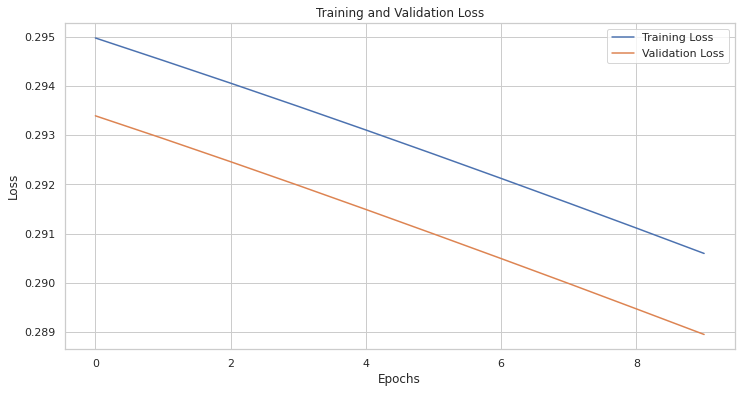

In [25]:
import matplotlib.pyplot as plt

# 손실 값 그래프
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Training Loss')  # 학습 손실
plt.plot(history.history['val_loss'], label='Validation Loss')  # 검증 손실
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<br>

### 4. Obtain the Latent Representations 

모델이 학습이 되었으며, 모델에 의해 학습된 input의 **잠재적인 변수로의 표현(latent representation)**을 얻을 수 있습니다. 이것은 훈련된 모델의 가중치(weight)로 접근할 수 있습니다. <br>
여기에서는 sequential layers을 포함하는 또 다른 네트워크를 만들고, 잠재적인 변수로의 표현(latent representation)이 존재하는 세 번째 layer까지만 훈련된 가중치를 추가할 것입니다.

In [26]:
hidden_representation = Sequential()  # Sequential 모델을 초기화하여 'hidden_representation' 변수에 저장
hidden_representation.add(autoencoder.layers[0])  # autoencoder 모델의 첫 번째 레이어를 추가 (입력 레이어)
hidden_representation.add(autoencoder.layers[1])  # autoencoder 모델의 두 번째 레이어를 추가 (첫 번째 인코딩 레이어)
hidden_representation.add(autoencoder.layers[2])  # autoencoder 모델의 세 번째 레이어를 추가 (두 번째 인코딩 레이어)

위의 모델을 사용하여 raw inputs을 예측하여 사기(Fraud)와 비사기(Non-Fraud)라는 두 가지 클래스에 대한 hidden representation vector을 생성합니다.

In [27]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000]) # 정상 label representation vector
fraud_hid_rep = hidden_representation.predict(x_fraud) # 사기 label representation vector

In [28]:
type(norm_hid_rep)
type(fraud_hid_rep)

numpy.ndarray

<br>

### 5. Visualize the latent representations : Fraud Vs Non Fraud

획득한 잠재적인 변수로의 표현(latent representation)을 사용하여 훈련 데이터셋을 만들고 사기(Fraud)와 비사기(Non-Fraud) 케이스의 특성을 시각화하겠습니다.

In [34]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)  # 정상(hidden representation)과 사기(hidden representation) 데이터를 세로(axis=0)로 합쳐 새로운 배열 'rep_x' 생성
print(f"rep_x shape: {rep_x.shape}")
y_n = np.zeros(norm_hid_rep.shape[0])  # 정상 데이터의 개수만큼 0으로 채워진 배열 생성 (레이블: 비사기)
print(f"y_n shape: {y_n.shape}")
y_f = np.ones(fraud_hid_rep.shape[0])  # 사기 데이터의 개수만큼 1로 채워진 배열 생성 (레이블: 사기)
print(f"y_f shape: {y_f.shape}")
rep_y = np.append(y_n, y_f)  # 정상 데이터 레이블과 사기 데이터 레이블을 합쳐 새로운 배열 'rep_y' 생성
print(f"rep_y shape: {rep_y.shape}")


rep_x shape: (3492, 50)
y_n shape: (3000,)
y_f shape: (492,)
rep_y shape: (3492,)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


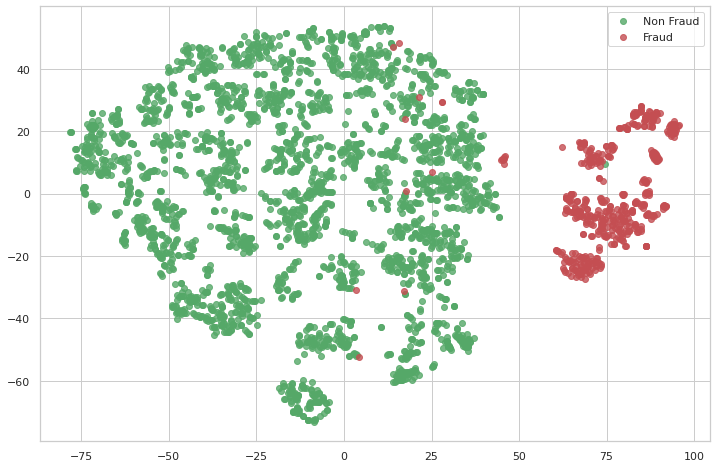

In [35]:
tsne_plot(rep_x, rep_y, "latent_representation.png")  # t-SNE 시각화 함수를 호출하여, 합쳐진 데이터 'rep_x'와 레이블 'rep_y'를 사용하여 그래프를 그리고 'latent_representation.png'로 저장

꽤나 정확하게 나뉘어진 그래프가 생성된 것을 확인할 수 있으며, 사기(Fraud)와 비사기(Non-Fraud) 거래가 가시적(visible)이고 선형적으로(linearly) 분리할 수 있음을 알 수 있습니다. 이제 두 클래스를 분류하기 위해 복잡한 모델보다 간단한 모델을 예측에 사용할 수 있습니다. <br>

아래의 그림은 사기(Fraud)와 비사기(Non-Fraud)의 전후 모습입니다. (차원 축소 알고리즘을 t-SNE와 비교) <br>
왼쪽이 t-SNE로 차원 축소한 결과, 오른쪽이 Autoencoder에서 Encoder로 차원 축소한 결과입니다.

![image](https://user-images.githubusercontent.com/54492747/149667858-868f8fa0-c26e-41f8-a99d-d0679a688eda.png)

이제 데이터셋에 대한 간단한 선형 분류기(linear classifier)를 훈련할 수 있습니다.

<br>

### 6. Simple Linear Classifier (Logistic Regression)

In [36]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)  # 데이터 rep_x와 레이블 rep_y를 75%는 학습용(train), 25%는 검증용(validation)으로 분할
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)  # 로지스틱 회귀 모델을 생성하고, 학습 데이터(train_x, train_y)로 모델을 학습
pred_y = clf.predict(val_x)  # 학습된 모델을 사용하여 검증 데이터(val_x)에 대한 예측을 수행하고, 예측된 레이블을 pred_y에 저장

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print('Logistic Regression Accuracy Score: ', round(accuracy_score(val_y, pred_y) * 100, 3).astype(str) + '%')


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       742
         1.0       1.00      0.92      0.96       131

    accuracy                           0.99       873
   macro avg       0.99      0.96      0.97       873
weighted avg       0.99      0.99      0.99       873


Logistic Regression Accuracy Score:  98.74%


**Solver 설명** : https://coduking.tistory.com/entry/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80-Solver-%EC%A2%85%EB%A5%98%EC%99%80-%EC%9E%A5%EB%8B%A8%EC%A0%90

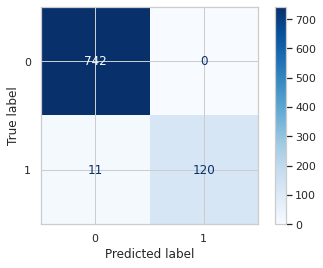

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred=pred_y, y_true=val_y)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Blues)

성능은 위와 같습니다. <br>
총 873건의 Test Set 중 Non-Fraud는 742건 & Fraud는 114건이고, Fraud는 129건 중 114건은 맞추고 17건은 틀린 것을 확인할 수 있습니다.

-----

### Reference
* [Raghavendra Chalapathy, Sanjay Chawla. “Deep Learning for Anomaly Detection: A Survey.” arXiv, 2019](https://arxiv.org/abs/1901.03407)
* [깃헙 블로그 글 - Anomaly Detection 개요](https://hoya012.github.io/blog/anomaly-detection-overview-1/)
	* 이상치 탐지 분야에 대한 소개 및 주요 문제와 핵심 용어, 산업 현장 적용 사례를 깔끔하게 잘 정리해주셨습니다.
* [고려대학교 DMQA 연구실 세미나 내용](http://dmqm.korea.ac.kr/activity/seminar/339)